# Xử lí dữ liệu

![a](https://wallpapercave.com/dwp1x/wp4908775.jpg)

### Những thư viện được sử dụng trong quá trình xử lí dữ liệu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataFiFa.csv')
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,"PSG,",", AM(CR),FW",13,1132,7,10,-,-,4.3,83.4,-,7,8.65
1,Neymar,"PSG,",", AM(CLR),FW",12(2),1085,11,9,3,-,2.4,82.6,0.1,2,7.96
2,Erling Haaland,"Man City,",", FW",12(1),1041,18,3,2,-,4,76.5,1,3,7.90
3,Kylian Mbappé,"PSG,",", AM(LR),FW",13(1),1146,12,2,2,-,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,"Man City,",", M(CLR),FW",13(1),1135,3,9,-,-,2.4,79.5,0.4,5,7.76


 <ul>
        Nhận xét: Sau khi scrawl dữ liệu về thì một số thuộc tính cần phải xử lí 
        <ul>
        <li> Thuộc tính Team cần xóa đi dấu phẩy sau tên mỗi câu lạc bộ </li>
        <li> Thuộc tính Position cần xóa đi dấu phẩy đầu tiên  </li>
        <li>Thuộc tính Apps chỉ lấy số lần xuất hiện và bỏ đi dữ liệu trong ngoặc để dễ dàng cho việc tính toán  </li>
        <li> Các thuộc tính nào có dữ liệu là '-' chuyển thành '0' </li>
        </ul>
    </ul>

In [3]:
print("Số dòng của tập dữ liệu: ",df.shape[0])
print("Số cột của tập dữ liệu: ",df.shape[1])

Số dòng của tập dữ liệu:  1446
Số cột của tập dữ liệu:  14


#### Ý nghĩa của mỗi cột (thuộc tính):

|Thuộc tính|Ý nghĩa|
|---|---|
|Player|Tên cầu thủ |
|Team|Câu lạc bộ|
|Position|Vị trí chơi của cầu thủ trên sân |
|Apps|Tổng số lần cầu thủ xuất hiện trên sân|
|Mins|Tổng thời gian chơi trên sân|
|Goals|Tổng số bàn thắng|
|Assists|Tổng số lần hỗ trợ|
|YelCard|Tổng số thẻ vàng mà cầu thủ nhân được|
|RedCard|Tổng số thẻ đỏ mà cầu thủ nhận được|
|SpG|Số cú sút mỗi trận.|
|PS|Tỉ lệ chuyền bóng thành công|
|AerialsWon|Tỉ lệ không chiến|
|MotM|Tổng số lần xuất sắc nhất trận mà cầu thủ nhận được|
|Rating|Tỉ lệ chung để đánh giá cầu thủ |


#### Tiến hành xử lí dữ liệu
- Xóa bỏ dấu phẩy ở sau tên mỗi câu lạc bộ trong tập dữ liệu bằng hàm rstrip 

In [4]:
df["Team"]= df['Team'].apply(lambda x: (x.rstrip(',')))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,", AM(CR),FW",13,1132,7,10,-,-,4.3,83.4,-,7,8.65
1,Neymar,PSG,", AM(CLR),FW",12(2),1085,11,9,3,-,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,", FW",12(1),1041,18,3,2,-,4,76.5,1,3,7.90
3,Kylian Mbappé,PSG,", AM(LR),FW",13(1),1146,12,2,2,-,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,", M(CLR),FW",13(1),1135,3,9,-,-,2.4,79.5,0.4,5,7.76


- Xóa bỏ dấu phẩy đầu tiên trong mỗi dòng dữ liệu bằng hàm lstrip 

In [5]:
df["Position"]= df['Position'].apply(lambda x: (x.lstrip(', ')))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",13,1132,7,10,-,-,4.3,83.4,-,7,8.65
1,Neymar,PSG,"AM(CLR),FW",12(2),1085,11,9,3,-,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,FW,12(1),1041,18,3,2,-,4,76.5,1,3,7.90
3,Kylian Mbappé,PSG,"AM(LR),FW",13(1),1146,12,2,2,-,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,"M(CLR),FW",13(1),1135,3,9,-,-,2.4,79.5,0.4,5,7.76


- Lấy dữ liệu đứng trước dấu '(' bằng hàm split và chuyển type của Apps thành int 

In [6]:
df["Apps"]= df['Apps'].apply(lambda x: int(x.split('(')[0]))
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",13,1132,7,10,-,-,4.3,83.4,-,7,8.65
1,Neymar,PSG,"AM(CLR),FW",12,1085,11,9,3,-,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,FW,12,1041,18,3,2,-,4,76.5,1,3,7.90
3,Kylian Mbappé,PSG,"AM(LR),FW",13,1146,12,2,2,-,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,"M(CLR),FW",13,1135,3,9,-,-,2.4,79.5,0.4,5,7.76


- Chuyển đổi '-' thành 0 của những thuộc tính có dòng dữ liệu chứa kí tự '-'

In [7]:
feature_ =['Goals','Assists','YelCard','RedCard','SpG','MotM','AerialsWon']

def delete_(df, feature_):
    for i in feature_:
        for temp in range(len(df[i])):
            if df[i][temp]=='-':
                df.loc[temp,i]= 0
delete_(df,feature_)
df.head()

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",13,1132,7,10,0,0,4.3,83.4,0,7,8.65
1,Neymar,PSG,"AM(CLR),FW",12,1085,11,9,3,0,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,FW,12,1041,18,3,2,0,4,76.5,1,3,7.90
3,Kylian Mbappé,PSG,"AM(LR),FW",13,1146,12,2,2,0,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,"M(CLR),FW",13,1135,3,9,0,0,2.4,79.5,0.4,5,7.76


#### Kiểm tra các giá trị: 
- Unique
- Null
- Tính tỉ lệ phần trăm Null
- Tính các giá trị duplicated 
- Kiểm tra có NaN hay không 
- Kiểu dữ liệu của mỗi thuộc tính 

In [8]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaN,Type
Player,1445,0,0.0,0,0,object
Team,98,0,0.0,0,0,object
Position,90,0,0.0,0,0,object
Apps,16,0,0.0,0,0,int64
Mins,785,0,0.0,0,0,int64
Goals,15,0,0.0,0,0,object
Assists,10,0,0.0,0,0,object
YelCard,8,0,0.0,0,0,object
RedCard,3,0,0.0,0,0,object
SpG,41,0,0.0,0,0,object


 <ul>
        Nhận xét:
        <ul>
        <li> Tập dữ liệu không có giá trị Null </li>
        <li> Tập dữ liệu không có Duplicated </li>
        <li> Nhưng type chưa hợp lệ vì thế cần phải chuyển đổi các cột sau: Goals, Assists, YelCard , RedCard, MotM về int và AerialsWon, SpG về float cho phù hợp và thuận tiện cho việc việc tính toán </li>
        </ul>
    </ul>

#### Tiến hành xử lí dữ liệu
- Chọn ra những thuộc tính cần cần chuyển đổi thành kiểu dữ liệu int. Ta dùng hàm astype để chuyển đổi

In [9]:
features = [ "Goals","Assists", "YelCard" ,"RedCard", "MotM"]

def convert_int_(df, features):
    for a in features:
        df[a] = df[a].astype("int")

convert_int_ (df, features)

- Chọn ra những thuộc tính cần cần chuyển đổi thành kiểu dữ liệu float. Ta dùng hàm astype để chuyển đổi

In [10]:
features_f = ['AerialsWon','SpG']
def convert_float(df, features):
    for a in features:
        df[a] = df[a].astype("float")
convert_float(df,features_f)

In [11]:
df.dtypes

Player         object
Team           object
Position       object
Apps            int64
Mins            int64
Goals           int32
Assists         int32
YelCard         int32
RedCard         int32
SpG           float64
PS            float64
AerialsWon    float64
MotM            int32
Ratting       float64
dtype: object

#### Mô tả dữ liệu 

In [12]:
df.describe()

,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,9.617566,853.340941,1.249654,0.858921,1.730982,0.094744,0.875104,78.749101,0.905325,0.460581,6.625138
std,3.922741,313.682420,1.908436,1.248174,1.451011,0.315702,0.735310,8.471487,0.813370,0.839860,0.305311
min,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.600000,0.000000,0.000000,5.980000
25%,7.000000,623.000000,0.000000,0.000000,1.000000,0.000000,0.300000,74.100000,0.300000,0.000000,6.420000
50%,10.000000,866.000000,1.000000,0.000000,1.000000,0.000000,0.700000,80.400000,0.600000,0.000000,6.590000
75%,13.000000,1115.250000,2.000000,1.000000,3.000000,0.000000,1.200000,84.700000,1.300000,1.000000,6.790000
max,15.000000,1350.000000,18.000000,10.000000,7.000000,2.000000,4.700000,96.500000,5.200000,7.000000,8.650000


#### Kiểm tra dữ liệu sau khi đã xử lí 

In [13]:
df.head(10)

,Player,Team,Position,Apps,Mins,Goals,Assists,YelCard,RedCard,SpG,PS,AerialsWon,MotM,Ratting
0,Lionel Messi,PSG,"AM(CR),FW",13,1132,7,10,0,0,4.3,83.4,0.0,7,8.65
1,Neymar,PSG,"AM(CLR),FW",12,1085,11,9,3,0,2.4,82.6,0.1,2,7.96
2,Erling Haaland,Man City,FW,12,1041,18,3,2,0,4.0,76.5,1.0,3,7.90
3,Kylian Mbappé,PSG,"AM(LR),FW",13,1146,12,2,2,0,4.3,84.0,0.4,1,7.87
4,Kevin De Bruyne,Man City,"M(CLR),FW",13,1135,3,9,0,0,2.4,79.5,0.4,5,7.76
5,Martin Terrier,Rennes,"AM(CL),FW",14,1204,8,3,0,0,3.0,76.4,4.0,7,7.76
6,Robert Lewandowski,Barcelona,FW,13,1068,13,4,0,1,3.6,80.0,1.1,7,7.73
7,Joshua Kimmich,Bayern,"D(CR),DMC,M(R)",14,1277,2,3,3,0,1.2,89.2,0.7,1,7.67
8,Rémy Cabella,Lille,"M(CLR),FW",8,724,3,5,0,0,1.2,86.4,0.2,1,7.65
9,Jamal Musiala,Bayern,M(CL),12,1000,9,6,0,0,2.6,83.9,0.5,3,7.64


#### Kiểm tra sự tương quan của các thuộc tính 

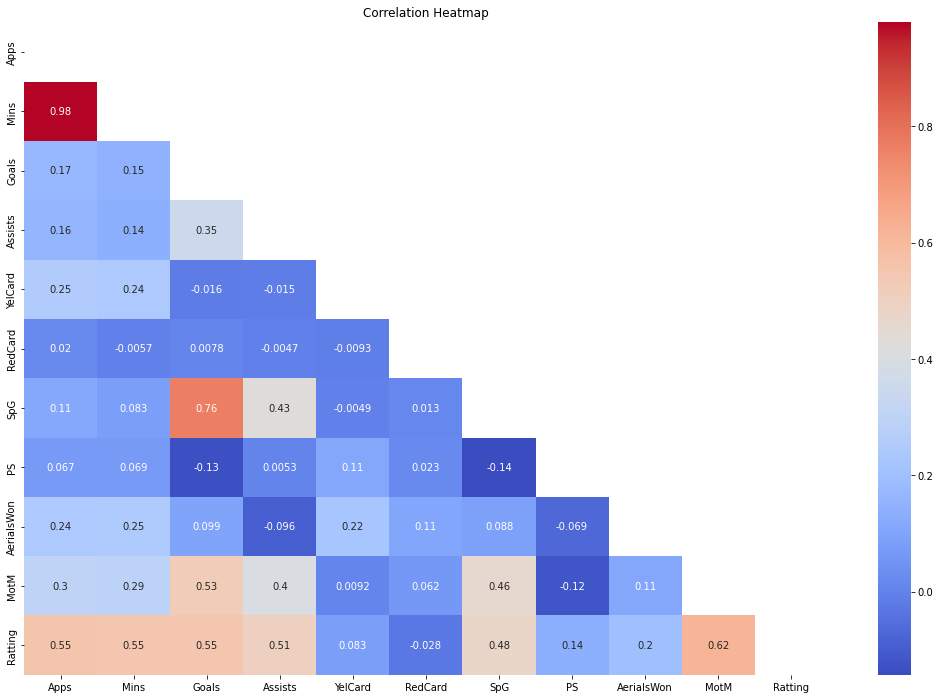

In [14]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

 <ul>
        Nhận xét:
        <ul>
        <li>Ratting tương quan cao với Apps, Mins, Goals, Assists, SpG, MotM</li>
        <li>MotM tương quan cao với Goals, Assists, SpG </li>
        <li>SpG tương quan cao với Goals, Assists </li>
        <li>Mins tương quan rất cao với Apps</li>
        </ul>
    </ul>

#### Khi khám phá và làm sạch xong, sẽ đưa nó về một file csv mới để thuận tiện cho những công việc ở phía sau.

In [15]:
df.to_csv("Data_Cleaned.csv", index = False)